In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv("gisette_train.data",sep=' ',header=None)
y_train = pd.read_csv("gisette_train.labels",sep=' ',header=None)
X_train.dropna(axis=1,how='all',inplace=True)
X_test = pd.read_csv("gisette_valid.data",sep=' ',header=None)
y_test = pd.read_csv("gisette_valid.labels",sep=' ',header=None)
X_test.dropna(axis=1,how='all',inplace=True)

In [ ]:
ss=StandardScaler()
ss.fit(X_train)
tf_X_train=ss.transform(X_train)
tf_X_test=ss.transform(X_test)

print(tf_X_train.shape)

(6000, 5000)


In [ ]:
lamb_list = [0.079,0.065,0.0515,0.03529,0.02808]
m=6000
n_iteration = 100
cost=[]
theta = np.zeros((tf_X_train.shape[1],1))
eta=0.1
cost=[]
missclassif_trainlist,missclassif_testlist=[],[]
tf_X_train = tf_X_train.T
tf_X_test = tf_X_test.T
y_train=y_train.replace(-1,0)
y_test=y_test.replace(-1,0)
for lamb in lamb_list:
  for k in range(n_iteration):
   z = np.dot(theta.T, tf_X_train)
   A = 1/(1+(np.exp(-z)))
   cost.append((-1/m) * np.sum(y_train.values.T * np.log(A) + (1 - y_train.values.T) * np.log(1 - A), axis=1) + (lamb/m) * np.sum(theta**2, axis=0))
   theta = theta - (eta * np.dot(tf_X_train, (A.T - y_train.values))/m) - (eta * (lamb/m) * theta) #Equation from slide 12, try making eta = 1/N
  #Calculate Threshold penalty here (This uses L1 norm calculation, defined by the second operand)
  for i in range(len(theta)):
    if (np.absolute(theta[i]) > lamb):
       theta[i] = theta[i] / (1 + eta)
    else:
       theta[i] = 0
  Z_train = np.dot(theta.T,tf_X_train)
  h_x_train = 1/(1+np.exp(-Z_train))
  y_pred_train = np.where(h_x_train<0.5,0,1)
  Z_test = np.dot(theta.T,tf_X_test)
  h_x_test = 1/(1+np.exp(-Z_test))
  y_pred_test = np.where(h_x_test<0.5,0,1)
  missclassif_trainlist.append((1-accuracy_score(y_train,y_pred_train.T))*6000)
  missclassif_testlist.append((1-accuracy_score(y_test, y_pred_test.T))*1000)
print(missclassif_trainlist, missclassif_testlist)

[838.0000000000003, 762.0, 499.00000000000034, 236.0, 180.00000000000017] [141.0, 124.0, 86.99999999999997, 50.00000000000004, 44.00000000000004]


In [ ]:
temp1 = np.array(missclassif_trainlist)
temp1 = temp1/6000
training_error = temp1*100
temp2 = np.array(missclassif_testlist)
temp2 = temp2/1000
test_error = temp2*100

In [ ]:
training_error

array([13.96666667, 12.7       ,  8.31666667,  3.93333333,  3.        ])

In [ ]:
test_error

array([14.1, 12.4,  8.7,  5. ,  4.4])

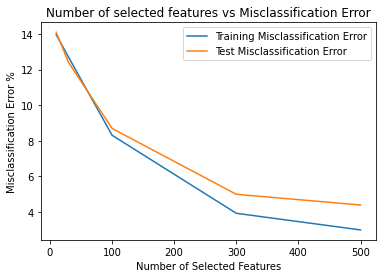

In [ ]:
plt.plot([10,30,100,300,500],training_error,label='Training Misclassification Error')
plt.plot([10,30,100,300,500],test_error,label='Test Misclassification Error')
plt.title("Number of selected features vs Misclassification Error")
plt.xlabel('Number of Selected Features')
plt.ylabel('Misclassification Error %')
plt.legend()

In [ ]:
lamb = 0.03529
m=6000
n_iteration = list(range(5,101,5))
cost=[]
theta = np.zeros((tf_X_train.shape[1],1))
eta=0.1
cost=[]
missclassif_trainlist,missclassif_testlist=[],[]
tf_X_train = tf_X_train.T
tf_X_test = tf_X_test.T
y_train=y_train.replace(-1,0)
y_test=y_test.replace(-1,0)
for lol in range(len(n_iteration)):
  for k in range(n_iteration[lol]):
   z = np.dot(theta.T, tf_X_train)
   A = 1/(1+(np.exp(-z)))
   cost.append((-1/m) * np.sum(y_train.values.T * np.log(A) + (1 - y_train.values.T) * np.log(1 - A), axis=1) + (lamb/m) * np.sum(theta**2, axis=0))
   theta = theta - (eta * np.dot(tf_X_train, (A.T - y_train.values))/m) - (eta * (lamb/m) * theta) #Equation from slide 12, try making eta = 1/N
  #Calculate Threshold penalty here (This uses L1 norm calculation, defined by the second operand)
  for i in range(len(theta)):
    if (np.absolute(theta[i]) > lamb):
       theta[i] = theta[i] / (1 + eta)
    else:
       theta[i] = 0
  Z_train = np.dot(theta.T,tf_X_train)
  h_x_train = 1/(1+np.exp(-Z_train))
  y_pred_train = np.where(h_x_train<0.5,0,1)
  Z_test = np.dot(theta.T,tf_X_test)
  h_x_test = 1/(1+np.exp(-Z_test))
  y_pred_test = np.where(h_x_test<0.5,0,1)
  missclassif_trainlist.append((1-accuracy_score(y_train,y_pred_train.T))*6000)
  missclassif_testlist.append((1-accuracy_score(y_test, y_pred_test.T))*1000)
print(missclassif_trainlist, missclassif_testlist)

[974.0, 866.9999999999998, 786.0, 733.9999999999998, 629.0, 556.0, 521.9999999999998, 489.0000000000001, 463.0000000000003, 433.0000000000003, 399.9999999999999, 369.9999999999999, 344.00000000000006, 315.99999999999983, 290.99999999999994, 278.9999999999999, 266.0, 252.00000000000023, 241.0000000000001, 230.9999999999999] [169.00000000000003, 153.00000000000003, 141.0, 135.0, 112.99999999999999, 109.99999999999999, 100.99999999999997, 96.99999999999997, 91.99999999999997, 86.99999999999997, 78.99999999999996, 74.99999999999996, 68.99999999999994, 64.99999999999994, 62.99999999999994, 59.00000000000005, 55.00000000000005, 52.00000000000004, 50.00000000000004, 49.00000000000004]


In [ ]:
temp1 = np.array(missclassif_trainlist)
temp1 = temp1/6000
training_error = temp1*100
temp2 = np.array(missclassif_testlist)
temp2 = temp2/1000
test_error = temp2*100

In [ ]:
training_error

array([16.23333333, 14.45      , 13.1       , 12.23333333, 10.48333333,
        9.26666667,  8.7       ,  8.15      ,  7.71666667,  7.21666667,
        6.66666667,  6.16666667,  5.73333333,  5.26666667,  4.85      ,
        4.65      ,  4.43333333,  4.2       ,  4.01666667,  3.85      ])

Text(0, 0.5, 'Training misclassification error %')

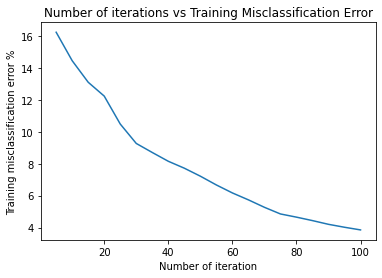

In [ ]:
plt.plot(n_iteration,training_error)
plt.title("Number of iterations vs Training Misclassification Error")
plt.xlabel('Number of iteration')
plt.ylabel("Training misclassification error %")